In [19]:
using CairoMakie
using LinearAlgebra
using LsqFit
using Statistics
using StatsBase

In [103]:
μ1, σ1 = 1.0, 0.5
μ2, σ2 = -1.0, 1.0

N = 1000
nbins = round(Int, sqrt(N))
samples_1 = randn(N ÷ 2) .* σ1 .+ μ1
samples_2 = randn(N ÷ 2) .* σ2 .+ μ2
samples = vcat(samples_1, samples_2)

1000-element Vector{Float64}:
  1.2453107481041719
  0.6474829874080361
  1.350654476510398
  1.0359874032206537
  0.5694912009170707
  0.6700920943624853
  0.8932787913571413
  1.0995166717994582
  1.5934310172235224
  1.092844808181115
  ⋮
 -1.7751816299960776
 -0.6045685589996614
 -3.874426359401656
  0.7749217696224597
 -1.8313860121207122
 -1.6052968651105095
 -0.999708848867283
  0.3500248002666526
 -2.2317853971028394

In [106]:
function multi_gaussian_pdf(x, p)
    num_gaussians = length(p) ÷ 2
    μ = @views p[1:num_gaussians]
    σ = @views p[num_gaussians+1:end]
    return [
        sum(
            exp(-0.5( (_x - μ[i])/σ[i])^2) / (√(2π) * σ[i])
            for i in 1:num_gaussians
        ) / num_gaussians
        for _x in x
    ]
end

function fit_multi_gaussian(samples, N)
    num_samples = length(samples)
    nbins = round(Int, sqrt(num_samples))

    histogram = normalize(fit(Histogram, samples; nbins), mode = :pdf)
    edges = histogram.edges[1]
    weights = histogram.weights
    centers = [0.5 * (edges[i] + edges[i+1]) for i in 1:length(edges)-1];

    μ_empirical = mean(samples)
    σ_empirical = stdm(samples, μ_empirical)

    μs = LinRange(μ_empirical - σ_empirical, μ_empirical + σ_empirical, N)
    σs = fill(σ_empirical / N, N)

    param = curve_fit(multi_gaussian_pdf, centers, weights, [μs; σs]).param

    μ = param[1:N]
    σ = param[N+1:end]
    return μ, σ
end

fit_multi_gaussian (generic function with 1 method)

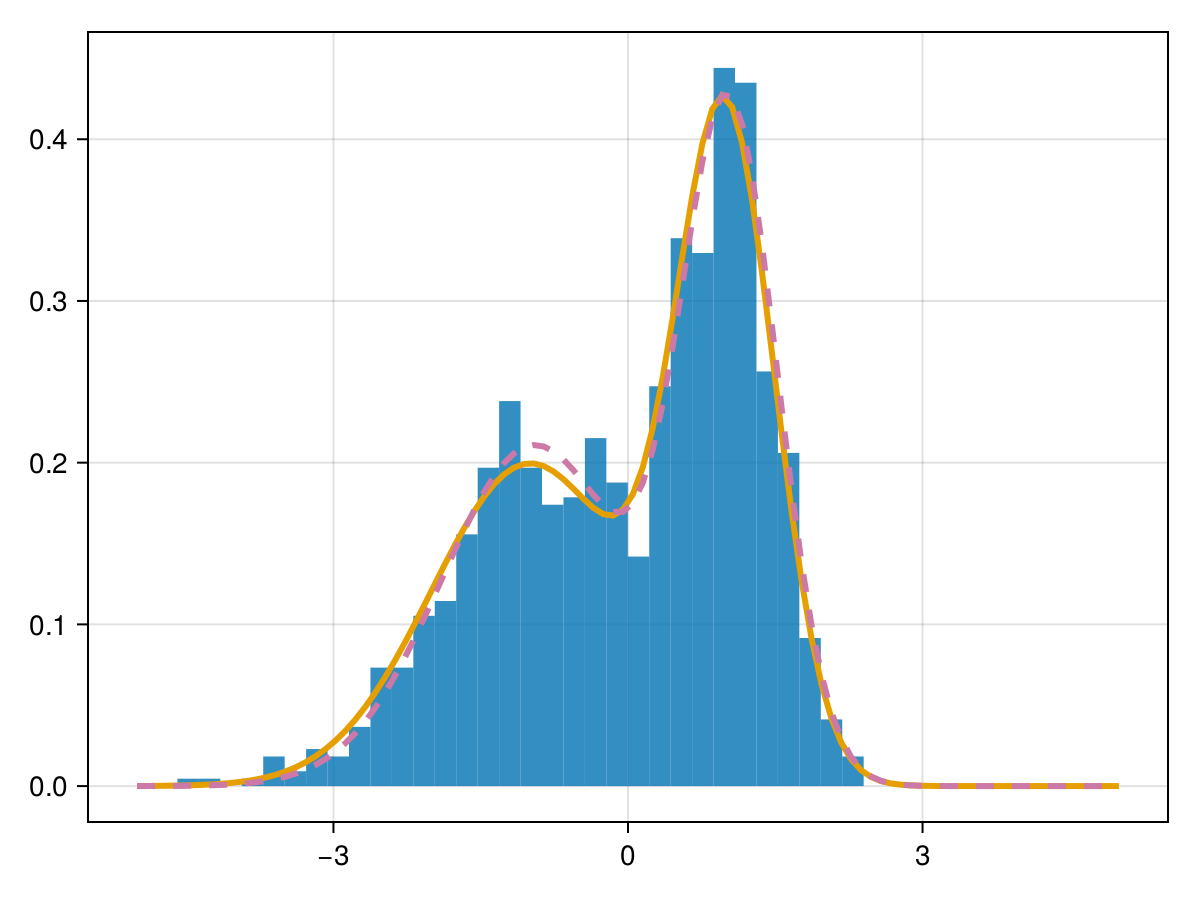

In [107]:
p0 = [μ1, μ2, σ1, σ2]
centers = LinRange(-5, 5, 100)
analytic_pdf = multi_gaussian_pdf(centers, p0)
f, ax, h = hist(samples; bins = nbins, normalization = :pdf)
colors = Makie.wong_colors()
lines!(ax, centers, analytic_pdf, color = colors[2], linewidth = 3)
μs, σs = fit_multi_gaussian(samples, 2)
lines!(ax, centers, multi_gaussian_pdf(centers, [μs; σs]), color = colors[4], linestyle = :dash, linewidth = 3)


f

In [81]:
pstar

4-element Vector{Float64}:
 -0.9951708265334448
  0.9998221844279033
  1.0008736694462446
  0.4957671344037764

In [82]:
p0

4-element Vector{Float64}:
  1.0
 -1.0
  0.5
  1.0